In [172]:
import pandas as pd
import missingno as msno

In [173]:
df_RUS = pd.read_csv('data/results/RUS.csv')
meta_rus = pd.read_csv('data/meta/meta_rus.csv')

In [174]:
#Посмотрим на информативность данных

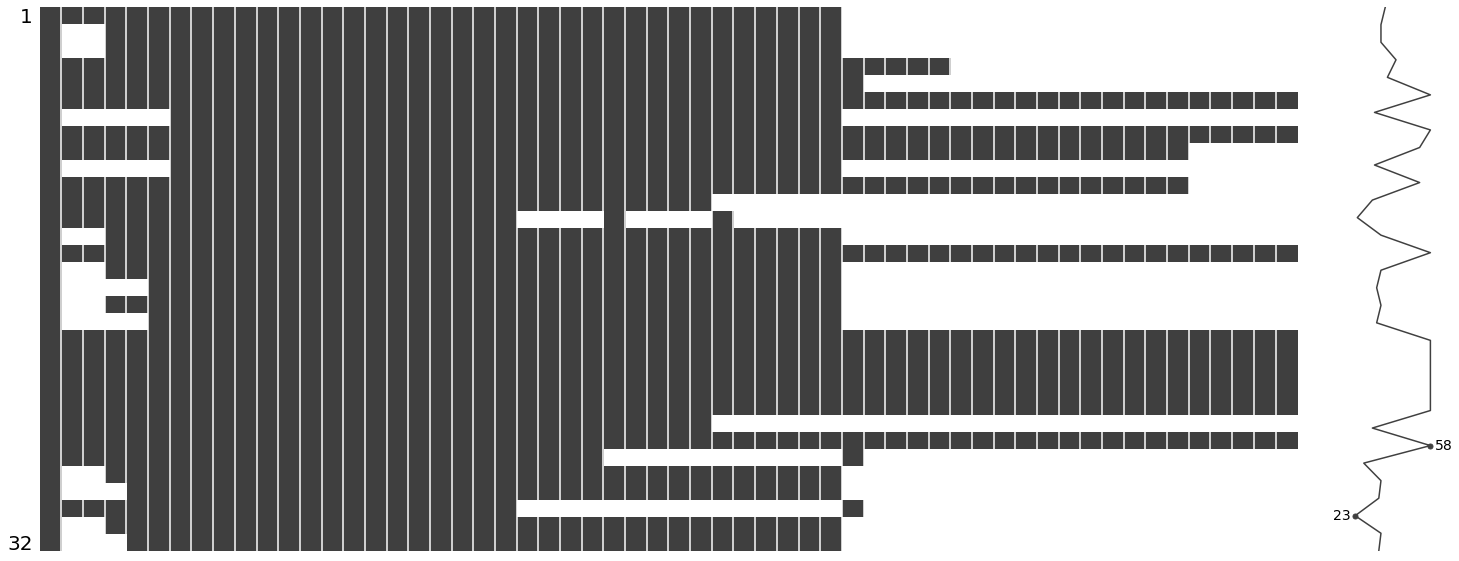

In [175]:
msno.matrix(df_RUS);

<AxesSubplot:>

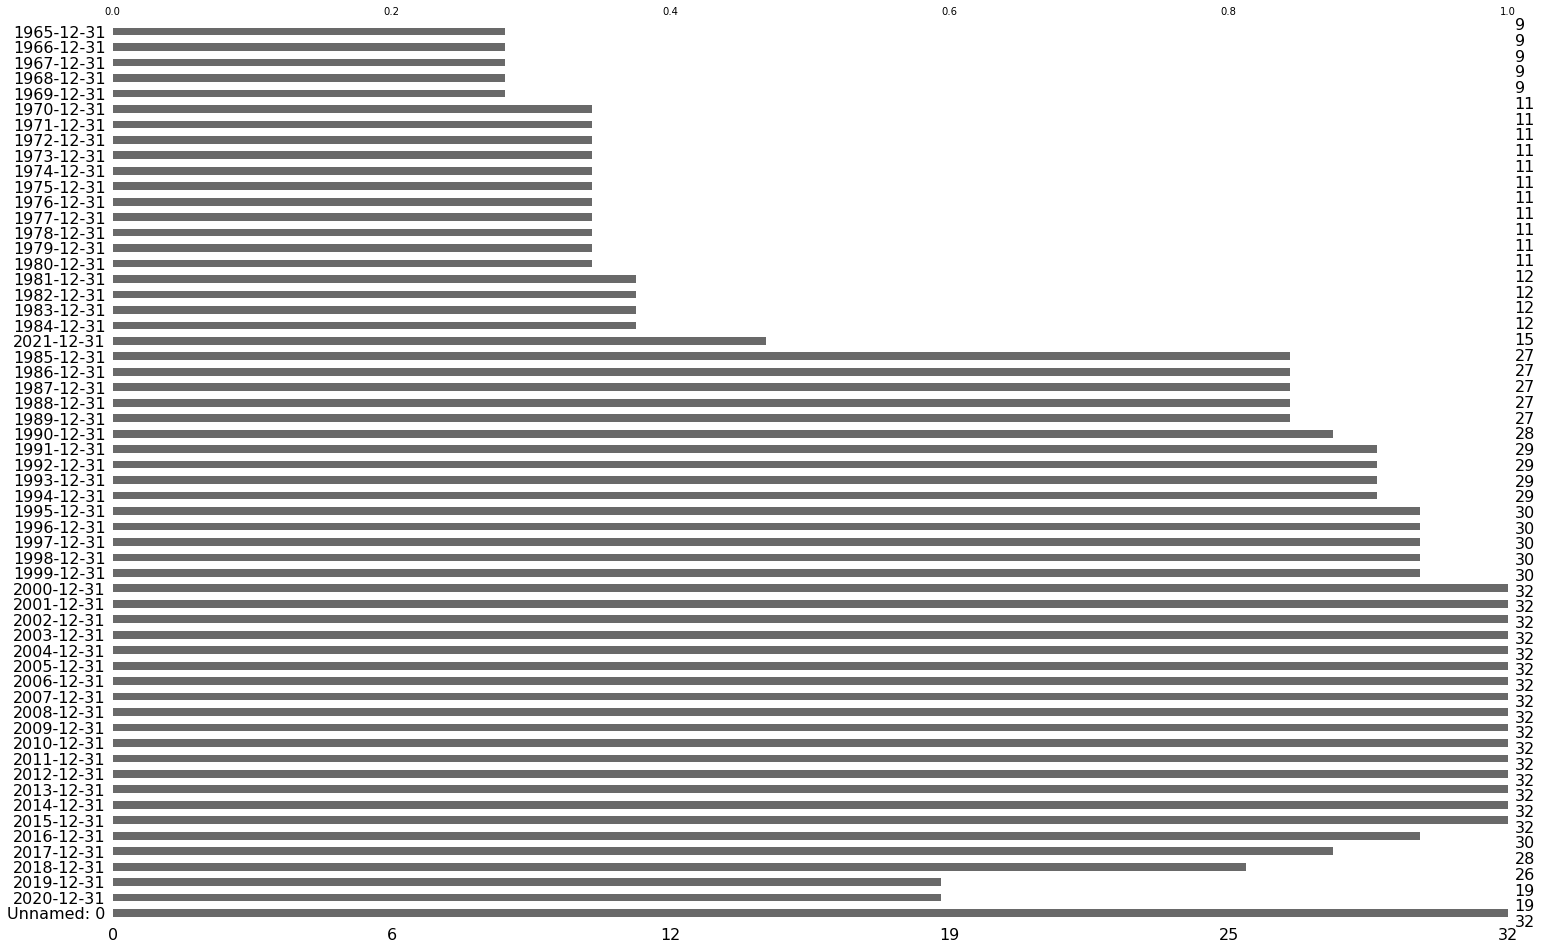

In [176]:
msno.bar(df_RUS)

In [177]:
missing_values_colums = ((df_RUS.isna().sum() / len(df_RUS)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_colums

Процент пропущенных значений:


Unnamed: 0     0.000
2000-12-31     0.000
2001-12-31     0.000
2002-12-31     0.000
2003-12-31     0.000
2004-12-31     0.000
2005-12-31     0.000
2006-12-31     0.000
2007-12-31     0.000
2008-12-31     0.000
2010-12-31     0.000
2009-12-31     0.000
2012-12-31     0.000
2013-12-31     0.000
2014-12-31     0.000
2015-12-31     0.000
2011-12-31     0.000
1997-12-31     6.250
2016-12-31     6.250
1995-12-31     6.250
1999-12-31     6.250
1998-12-31     6.250
1996-12-31     6.250
1994-12-31     9.375
1992-12-31     9.375
1991-12-31     9.375
1993-12-31     9.375
2017-12-31    12.500
1990-12-31    12.500
1985-12-31    15.625
1986-12-31    15.625
1987-12-31    15.625
1989-12-31    15.625
1988-12-31    15.625
2018-12-31    18.750
2019-12-31    40.625
2020-12-31    40.625
2021-12-31    53.125
1984-12-31    62.500
1983-12-31    62.500
1982-12-31    62.500
1981-12-31    62.500
1973-12-31    65.625
1970-12-31    65.625
1971-12-31    65.625
1972-12-31    65.625
1974-12-31    65.625
1980-12-31   

In [178]:
#Моим решением будет удалить колонки где пропущено значений больше 50%

In [179]:
#df_RUS = df_RUS.drop(columns=['1965-12-31', ''])
for key in missing_values_colums.index:
    if missing_values_colums[key] >50:
        df_RUS = df_RUS.drop(columns=[key])

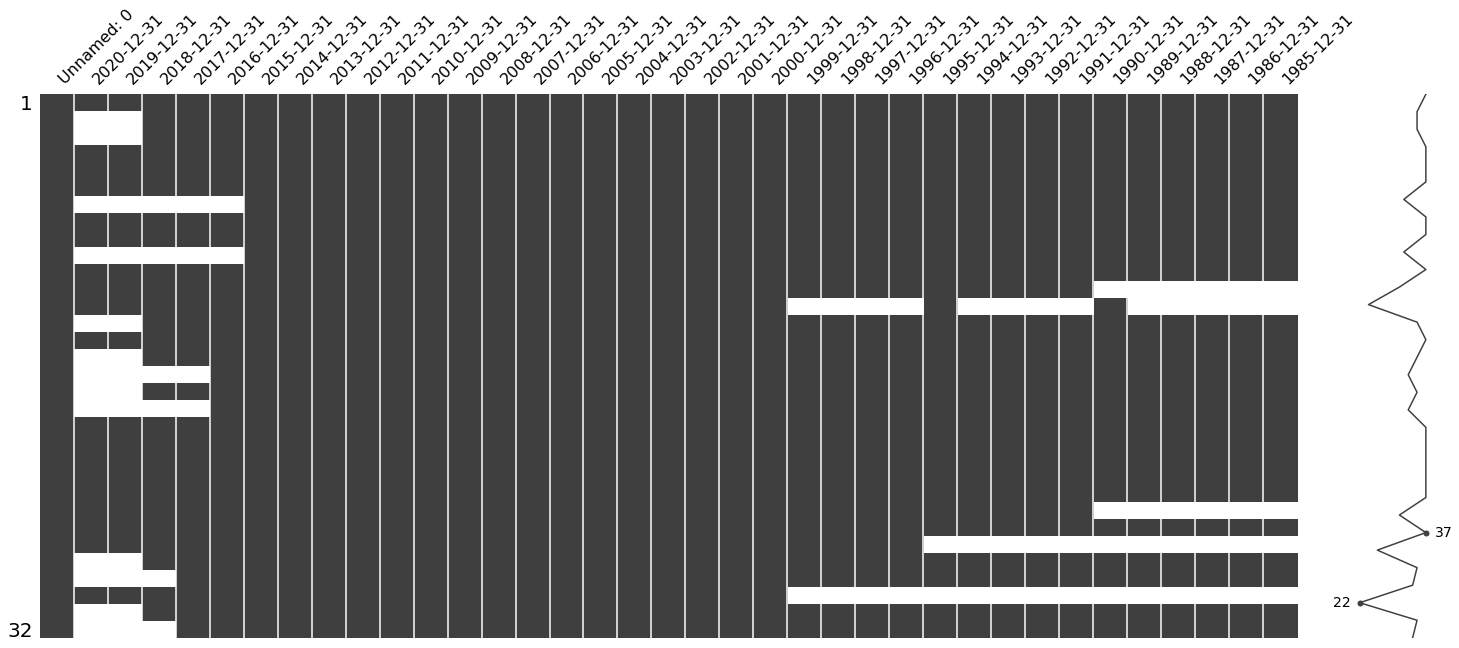

In [180]:
msno.matrix(df_RUS);

In [181]:
missing_values_index = ((df_RUS.transpose().isna().sum() / len(df_RUS)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values_index

Процент пропущенных значений:


0      0.000
25     0.000
3      0.000
4      0.000
5      0.000
23     0.000
7      0.000
8      0.000
22     0.000
10     0.000
21     0.000
20     0.000
19     0.000
14     0.000
27     6.250
17     6.250
15     6.250
30     6.250
13     6.250
2      6.250
1      6.250
28     9.375
31     9.375
18    12.500
16    12.500
9     15.625
6     15.625
11    18.750
24    18.750
26    34.375
12    40.625
29    46.875
dtype: float64

<AxesSubplot:>

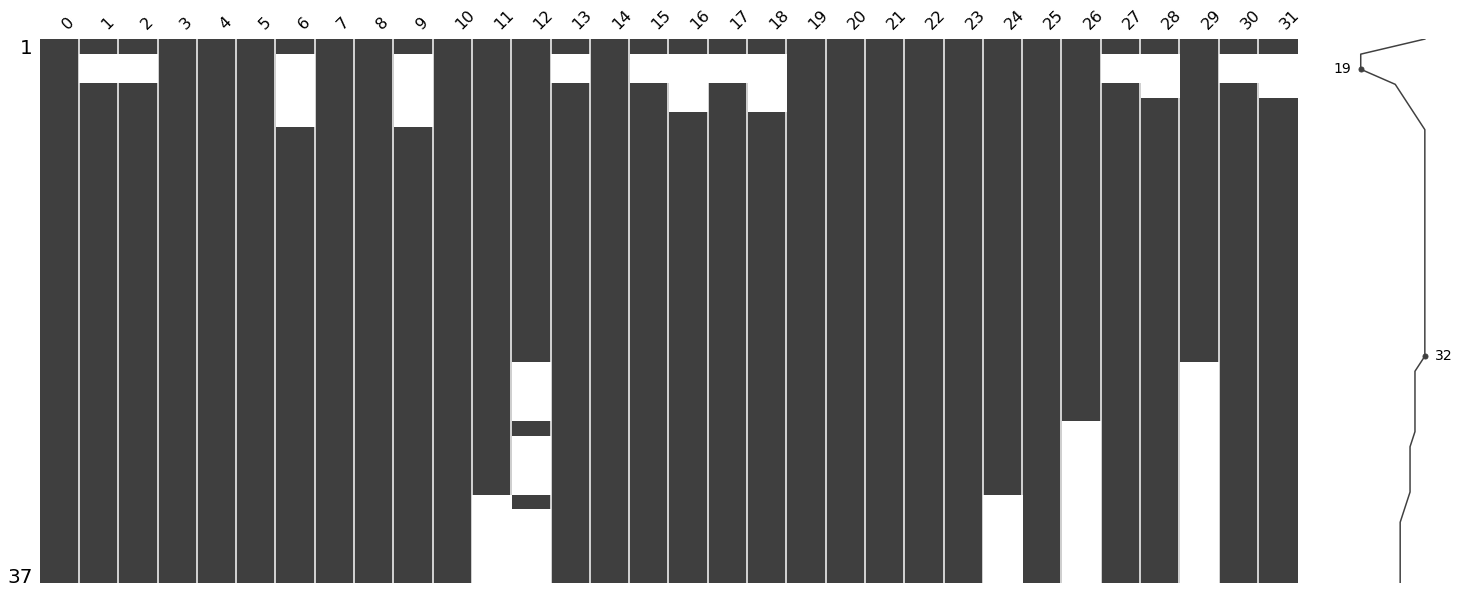

In [182]:
msno.matrix(df_RUS.transpose())

In [183]:
#пропущенные значение, после которых есть данные экстрополируем

In [184]:

nan = df_RUS.isna()
for i in range(len(df_RUS)):
    value_1 = [-1, -1]
    value_2 = [-1, -1]
    step = 0
    for j in range(5, len(df_RUS.iloc[i, :])):
        if nan.iloc[i, j]:
            if value_1[0] == -1:
                value_1[0] = df_RUS.iloc[i, j - 1]
                value_1[1] = j -1
        else:
            if value_1[0] != -1:
                value_2[0] = df_RUS.iloc[i, j]
                value_2[1] = j
                step = (value_1[0] - value_2[0]) / (value_2[1] - value_1[1] - 1)
                for k in range(value_1[1] + 1, value_2[1], 1):
                    df_RUS.iloc[i, k] = df_RUS.iloc[i, k - 1] - step
                value_1[0] = -1
                value_1[1] = -1
                    
                
                
        #print(df_RUS.iloc[i, j])

In [185]:
#так как я планирую сравнить добычу энергию в разных странах, такого заполнения будет достаточно. 
#теперь проверим данные на аномалии и выбросы

In [186]:
type(df.iloc[0,0])

str

In [187]:
df_RUS

,Unnamed: 0,2020-12-31,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,2012-12-31,...,1994-12-31,1993-12-31,1992-12-31,1991-12-31,1990-12-31,1989-12-31,1988-12-31,1987-12-31,1986-12-31,1985-12-31
0,C02_EMMISSIONS_RUS,1482.188474,1595.685634,1605.961797,1548.600760,1566.991267,1549.537429,1579.221849,1581.054684,1605.049890,...,1726.273253,1895.209017,2072.562784,2167.920631,2233.920546,2290.075533,2291.762951,2268.329301,2210.804710,2172.398535
1,COAL_CONSUM_O_RUS,NaN,NaN,88.031641,83.930000,89.250000,92.148000,87.551800,90.517000,98.425600,...,123.923057,141.691294,156.982506,167.060278,182.305539,196.807160,203.534127,206.583335,203.479018,198.098453
2,COAL_PROD_O_RUS,NaN,NaN,220.154320,205.800000,193.970000,186.368000,176.591800,173.117000,168.285600,...,131.339800,147.576666,163.634224,170.643564,185.561140,192.345675,199.956536,193.731041,192.173409,185.805669
3,COAL_PROD_RUS,399.664238,440.905783,441.576471,412.540341,386.613471,372.482353,357.396992,355.231000,358.300000,...,278.304176,311.862059,349.004176,362.235882,405.194118,422.800000,440.000000,424.087000,423.948000,409.252000
4,ELEC_GEN_RUS,1085.418730,1118.143230,1109.197790,1091.184000,1090.970224,1067.543299,1064.196500,1059.085500,1069.289300,...,875.914000,956.587000,1008.450000,1068.163300,1082.200000,1076.500000,1065.500000,1047.300000,1001.400000,962.000000
5,GAS_CONSUM_D_RUS,40.861130,42.988367,43.973945,41.710060,40.587391,39.540311,40.848735,41.106986,41.357320,...,37.280683,39.682918,39.689908,41.115441,40.074405,39.478271,38.793658,36.862382,34.851636,34.452094
6,GAS_CONSUM_O_RUS,NaN,NaN,NaN,NaN,NaN,352.336204,370.694233,372.115630,374.614209,...,341.267660,363.257733,364.317122,376.371062,366.841416,361.384401,356.090368,337.438533,319.032142,315.374729
7,GAS_CONSUM_RUS,423.483407,444.312721,454.499313,431.100591,420.646390,408.674822,422.198243,424.867430,428.625903,...,385.320101,410.148757,411.344897,424.954816,414.195038,408.033606,402.056195,380.996693,360.214318,356.084789
8,GAS_PROD_D_RUS,61.491342,65.699286,64.738353,61.492102,56.858089,56.545989,57.195739,59.454045,58.071873,...,54.034637,55.013364,57.143470,57.211052,58.011829,54.790926,52.334190,48.429200,44.754524,41.108321
9,GAS_PROD_O_RUS,NaN,NaN,NaN,NaN,NaN,515.972852,523.570237,544.242789,533.046789,...,494.633485,503.592761,524.524888,523.710409,531.040725,501.556562,480.380092,443.321268,409.683259,376.305883


TypeError: can only concatenate str (not "numpy.float64") to str

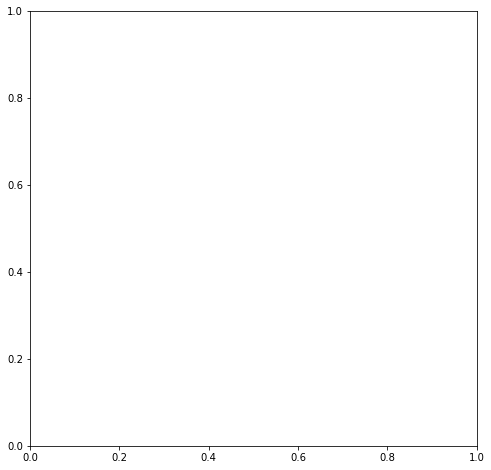

In [150]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
df = df_RUS.iloc[12, :]
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df)
ax.set_ylabel('Количество пройденных миль')
ax.set_title('Ящик с усами для количества пройденных миль (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))